# Pandas Applying Functions

In [83]:
import ast
import pandas as pd
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Check the first few rows for any obvious issues
print(df['job_skills'].head())

# Function to safely evaluate strings to lists, handling NaN and malformed values
def safe_literal_eval(x):
    if pd.isna(x):  # Check for NaN values
        return []  # Return empty list if NaN
    try:
        return ast.literal_eval(x) if isinstance(x, str) else []  # Only try to evaluate string-like values
    except (ValueError, SyntaxError):  # Catch malformed strings
        return []  # Return empty list in case of an error

# Apply the function to convert job_skills column
df['job_skills'] = df['job_skills'].apply(safe_literal_eval)



0                                                 None
1    ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2    ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3    ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4    ['bash', 'python', 'oracle', 'aws', 'ansible',...
Name: job_skills, dtype: object


### Example 1

Calculate projected salaries next year, using an assumed rate of 3.0% for all roles.

In [76]:
def inflation(salary):
    return salary * 1.03

df['salary_year_inflated'] = df['salary_year_avg'].apply(inflation)

df[pd.notna(df['salary_year_avg'])][['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


We can actually simplify this with a lambda function.

In [77]:
df['salary_year_inflated'] = df['salary_year_avg'].apply(lambda salary: salary * 1.03)

df[pd.notna(df['salary_year_avg'])][['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


Now technically this could have been done like this... 

In [78]:
df['salary_year_inflated'] = df['salary_year_avg'] * 1.03

df[pd.notna(df['salary_year_avg'])][['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


### Example 2

Calculate projected salaries next year, but:
- For senior roles (e.g., Senior Data Analysts), assume the rate is 5%
- For all other roles, assume rate is 3%

In [79]:
def projected_salary(row):
    if 'Senior' in row['job_title_short']:
        return  1.05 * row['salary_year_avg']
    else:
        return  1.03 * row['salary_year_avg']

df['salary_year_inflated'] = df.apply(projected_salary, axis=1)

df[pd.notna(df['salary_year_avg'])][['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


Technically you could write this with a lambda function:

In [80]:
df['salary_year_inflated'] = df.apply(lambda row: 1.05 * row['salary_year_avg'] if 'Senior' in row['job_title_short'] else 1.03 * row['salary_year_avg'], axis=1)

df[pd.notna(df['salary_year_avg'])][['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


#### Visualization of Average Yearly Salaries and their Inflated Rates

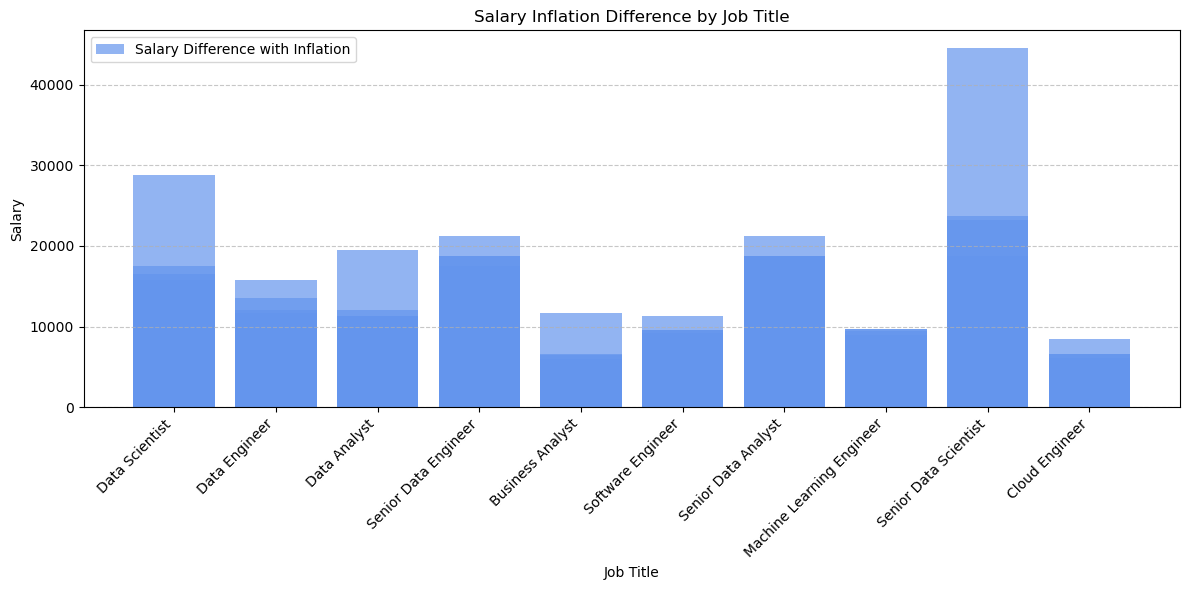

In [81]:
# Calculate the difference between inflated salary and average salary
df['salary_difference'] = df['salary_year_inflated'] - df['salary_year_avg']

# Filter out rows where salary_year_avg is NaN and select the relevant columns
filtered_df = df[pd.notna(df['salary_year_avg'])][['job_title_short', 'salary_difference']]

# Plotting the salary difference by job title
plt.figure(figsize=(12, 6))

# Bar plot for salary difference (light blue)
plt.bar(filtered_df['job_title_short'], filtered_df['salary_difference'], alpha=0.7, color='cornflowerblue', label='Salary Difference with Inflation')

# Adding labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Inflation Difference by Job Title')

# Rotate the x-axis labels to make them readable if there are too many job titles
plt.xticks(rotation=45, ha='right')

plt.legend(loc="upper left")

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to make it look cleaner
plt.tight_layout()

# Show the plot
plt.show()
